In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [2]:
df_basic_release = pd.read_csv('../independent_metrics/basic_release.csv', index_col='bug_id')
df_basic_beta = pd.read_csv('../independent_metrics/basic_beta.csv', index_col='bug_id')
df_basic_aurora = pd.read_csv('../independent_metrics/basic_aurora.csv', index_col='bug_id')

df_bug_inducing = pd.read_csv('../independent_metrics/bug_inducing.csv', index_col='bug_id')

df_release = pd.merge(df_basic_release, df_bug_inducing, left_index=True, right_index=True)
df_beta = pd.merge(df_basic_beta, df_bug_inducing, left_index=True, right_index=True)
df_aurora = pd.merge(df_basic_aurora, df_bug_inducing, left_index=True, right_index=True)

In [3]:
df_release = df_release[df_release.component != 'Pocket']
df_beta = df_beta[df_beta.component != 'Pocket']
df_aurora = df_aurora[df_aurora.component != 'Pocket']

In [4]:
df_release.shape

(285, 33)

In [5]:
df_beta.shape

(2614, 33)

In [6]:
df_aurora.shape

(4368, 33)

In [7]:
df_release = df_release[df_release['uplift_accepted'] == True]
df_beta = df_beta[df_beta['uplift_accepted'] == True]
df_aurora = df_aurora[df_aurora['uplift_accepted'] == True]

In [12]:
df_release = df_release[df_release.component != 'Pocket']
df_beta = df_beta[df_beta.component != 'Pocket']
df_aurora = df_aurora[df_aurora.component != 'Pocket']

In [13]:
df_release.shape

(229, 33)

In [14]:
df_beta.shape

(2386, 33)

In [15]:
df_aurora.shape

(4306, 33)

In [16]:
df_release.component = df_release.component.apply(lambda x: x.split(':')[0])
df_beta.component = df_beta.component.apply(lambda x: x.split(':')[0])
df_aurora.component = df_aurora.component.apply(lambda x: x.split(':')[0])

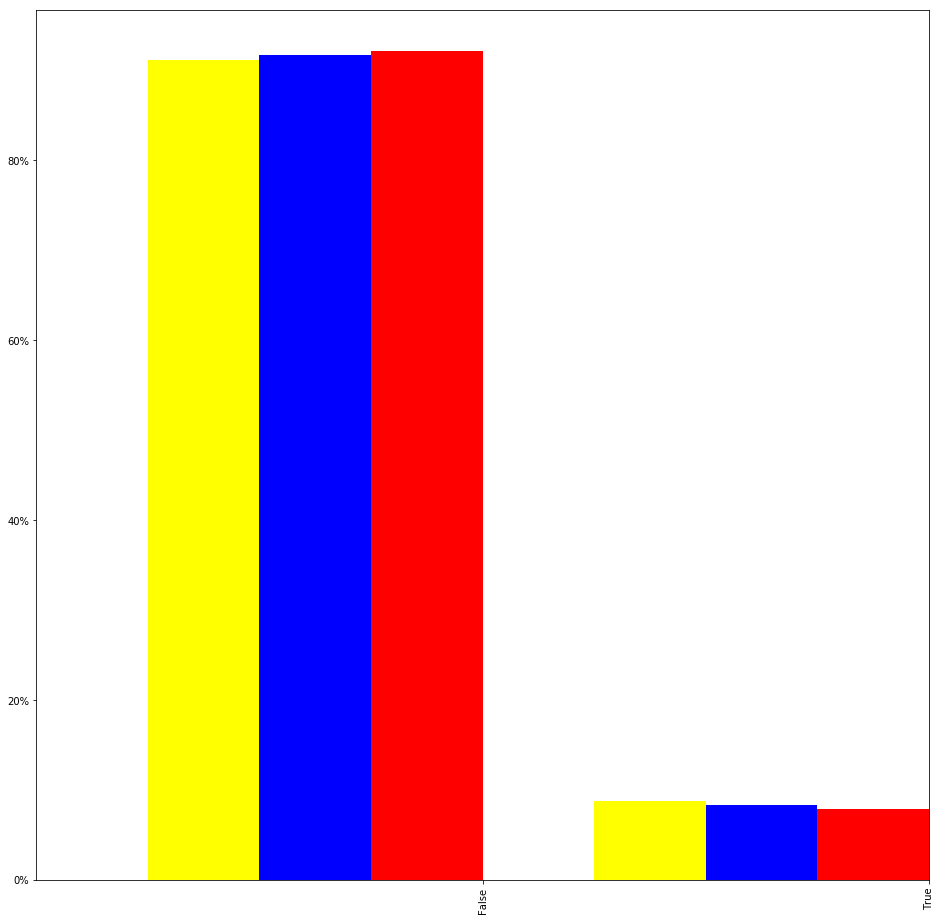

In [17]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
df_release['error_inducing'].value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=1, width=0.25)
df_beta['error_inducing'].value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=2, width=0.25)
df_aurora['error_inducing'].value_counts(normalize=True).plot(kind='bar', color="yellow", ax=ax, position=3, width=0.25)
plt.show()

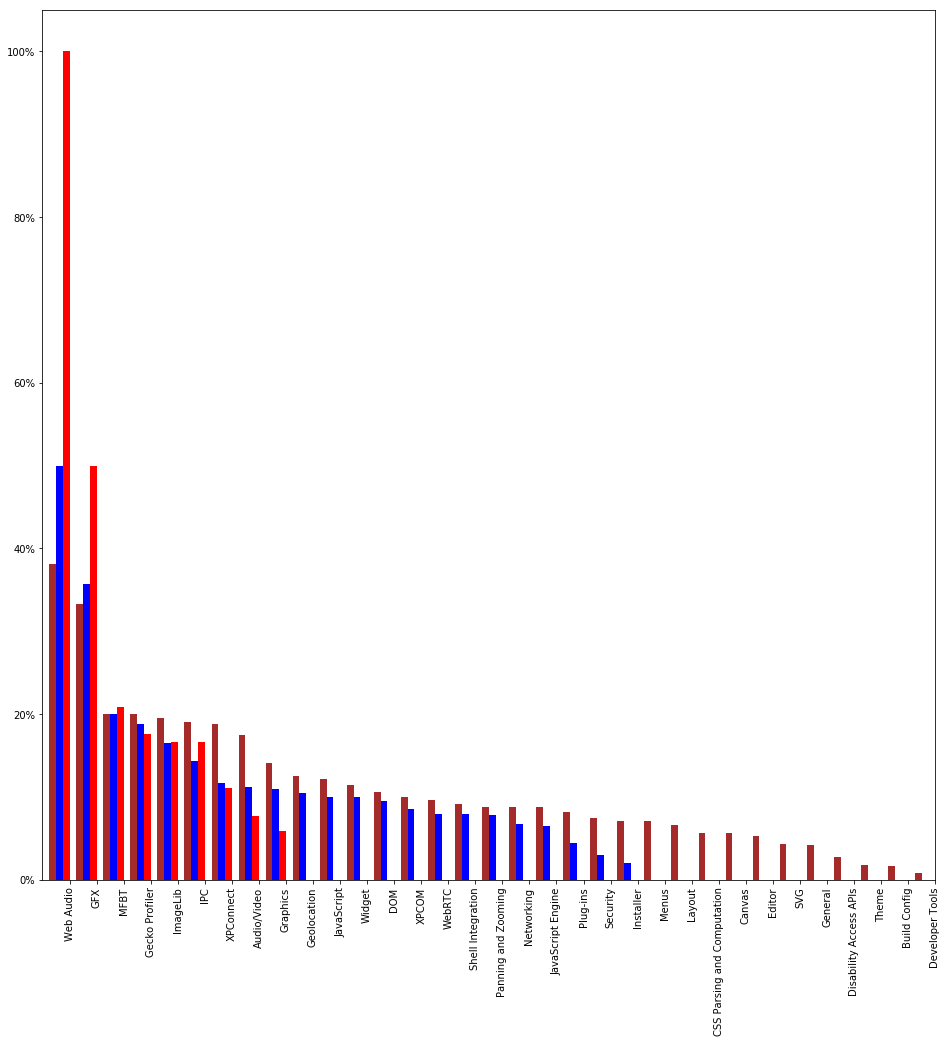

In [18]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res1 = df_release[df_release['error_inducing'] == True].component.value_counts() / df_release.component.value_counts()
res1.dropna().sort_values(ascending=False).plot(kind='bar', color="red", position=1, width=0.25)
res2 = df_beta[df_beta['error_inducing'] == True].component.value_counts() / df_beta.component.value_counts()
res2.dropna().sort_values(ascending=False).plot(kind='bar', color="blue", position=2, width=0.25)
res3 = df_aurora[df_aurora['error_inducing'] == True].component.value_counts() / df_aurora.component.value_counts()
res3.dropna().sort_values(ascending=False).plot(kind='bar', color="brown", position=3, width=0.25)
plt.show()

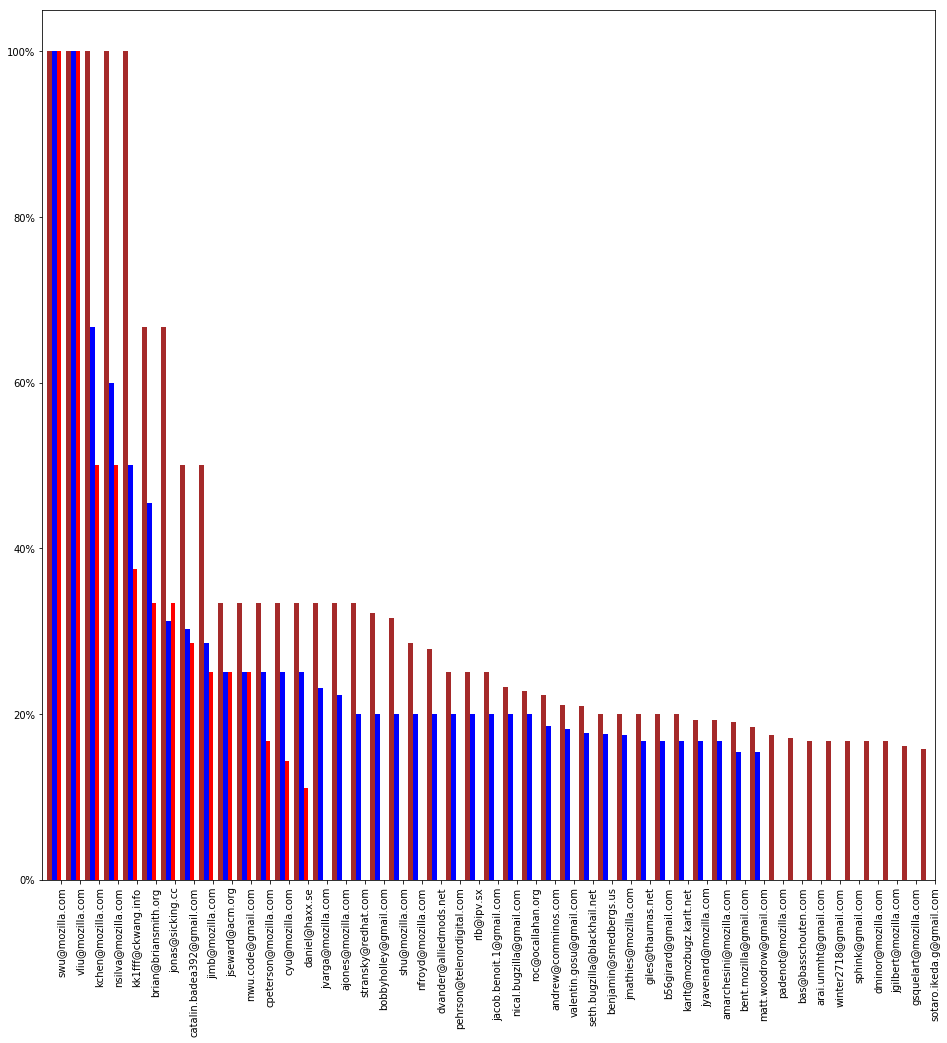

In [19]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res1 = df_release[df_release['error_inducing'] == True].bug_assignee.value_counts() / df_release.bug_assignee.value_counts()
res1.where(lambda x : x > 0.01).dropna().sort_values(ascending=False).plot(kind='bar', color="red", position=1, width=0.25)
res2 = df_beta[df_beta['error_inducing'] == True].bug_assignee.value_counts() / df_beta.bug_assignee.value_counts()
res2.where(lambda x : x > 0.15).dropna().sort_values(ascending=False).plot(kind='bar', color="blue", position=2, width=0.25)
res3 = df_aurora[df_aurora['error_inducing'] == True].bug_assignee.value_counts() / df_aurora.bug_assignee.value_counts()
res3.where(lambda x : x > 0.15).dropna().sort_values(ascending=False).plot(kind='bar', color="brown", position=3, width=0.25)
plt.show()

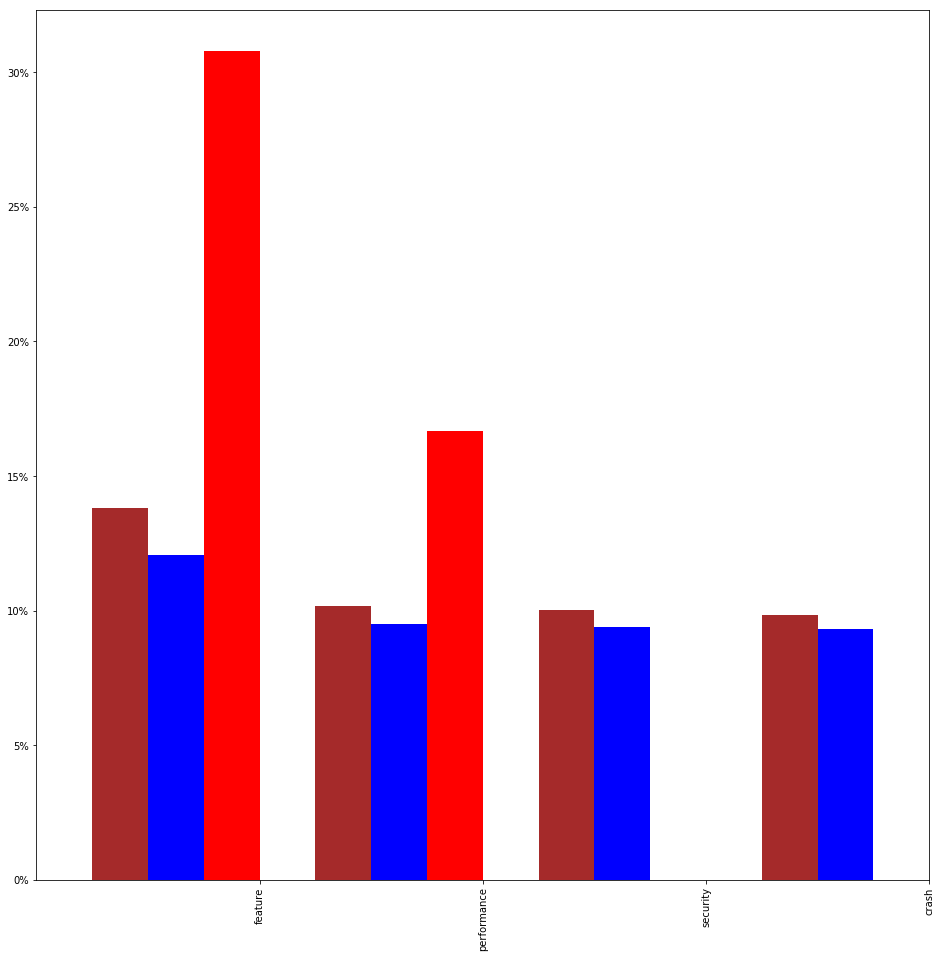

In [20]:
types1 = df_release.types.str.split('^').apply(pd.Series, 1).stack()
types1.index = types1.index.droplevel(-1)
types1.name = 'Type'
types_bug_inducing1 = df_release[df_release['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing1.index = types_bug_inducing1.index.droplevel(-1)
types_bug_inducing1.name = 'Type'
types2 = df_beta.types.str.split('^').apply(pd.Series, 1).stack()
types2.index = types2.index.droplevel(-1)
types2.name = 'Type'
types_bug_inducing2 = df_beta[df_beta['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing2.index = types_bug_inducing2.index.droplevel(-1)
types_bug_inducing2.name = 'Type'
types3 = df_aurora.types.str.split('^').apply(pd.Series, 1).stack()
types3.index = types3.index.droplevel(-1)
types3.name = 'Type'
types_bug_inducing3 = df_aurora[df_aurora['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing3.index = types_bug_inducing3.index.droplevel(-1)
types_bug_inducing3.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res1 = types_bug_inducing1.value_counts() / types1.value_counts()
res1.sort_values(ascending=False).plot(kind='bar', color="red", position=1, width=0.25)
res2 = types_bug_inducing2.value_counts() / types2.value_counts()
res2.sort_values(ascending=False).plot(kind='bar', color="blue", position=2, width=0.25)
res3 = types_bug_inducing3.value_counts() / types3.value_counts()
res3.sort_values(ascending=False).plot(kind='bar', color="brown", position=3, width=0.25)
plt.show()

## Release uplifts

### Bug-inducing vs non-bug-inducing uplifts per component

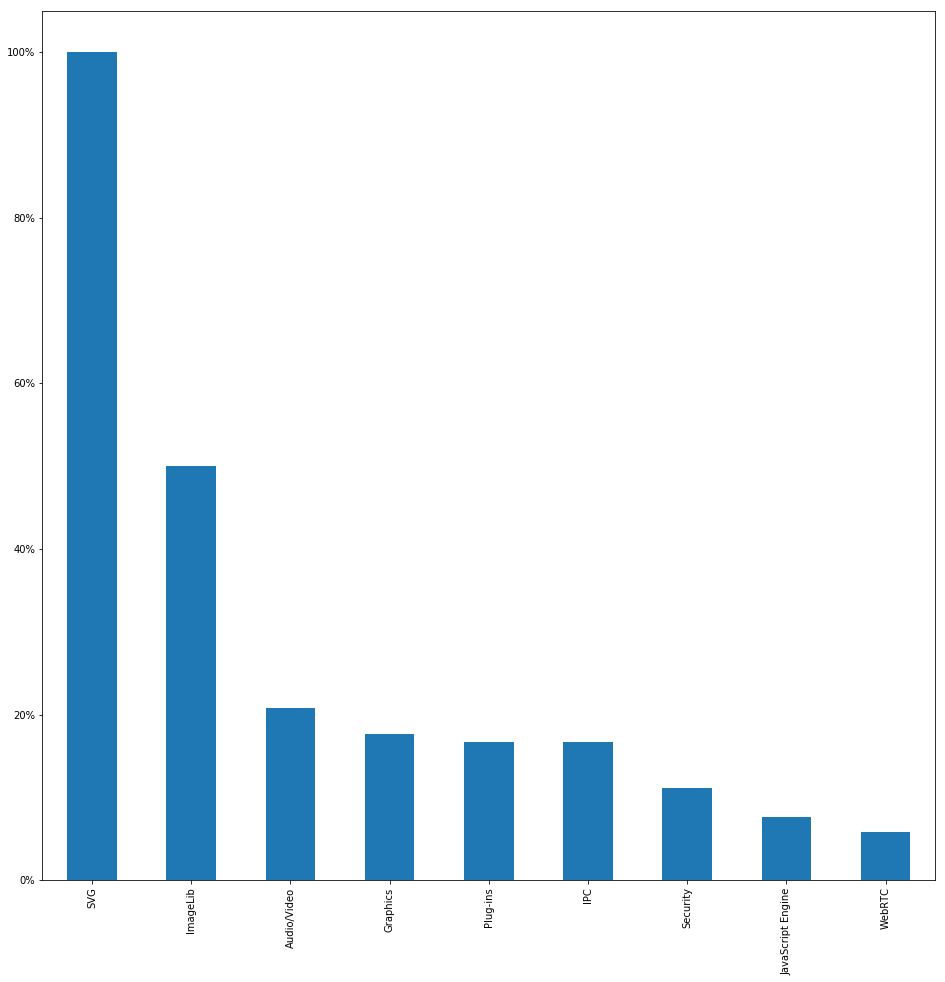

In [21]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_release[df_release['error_inducing'] == True].component.value_counts() / df_release.component.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar')
plt.show()

### Bug-inducing vs non-bug-inducing uplifts per bug type

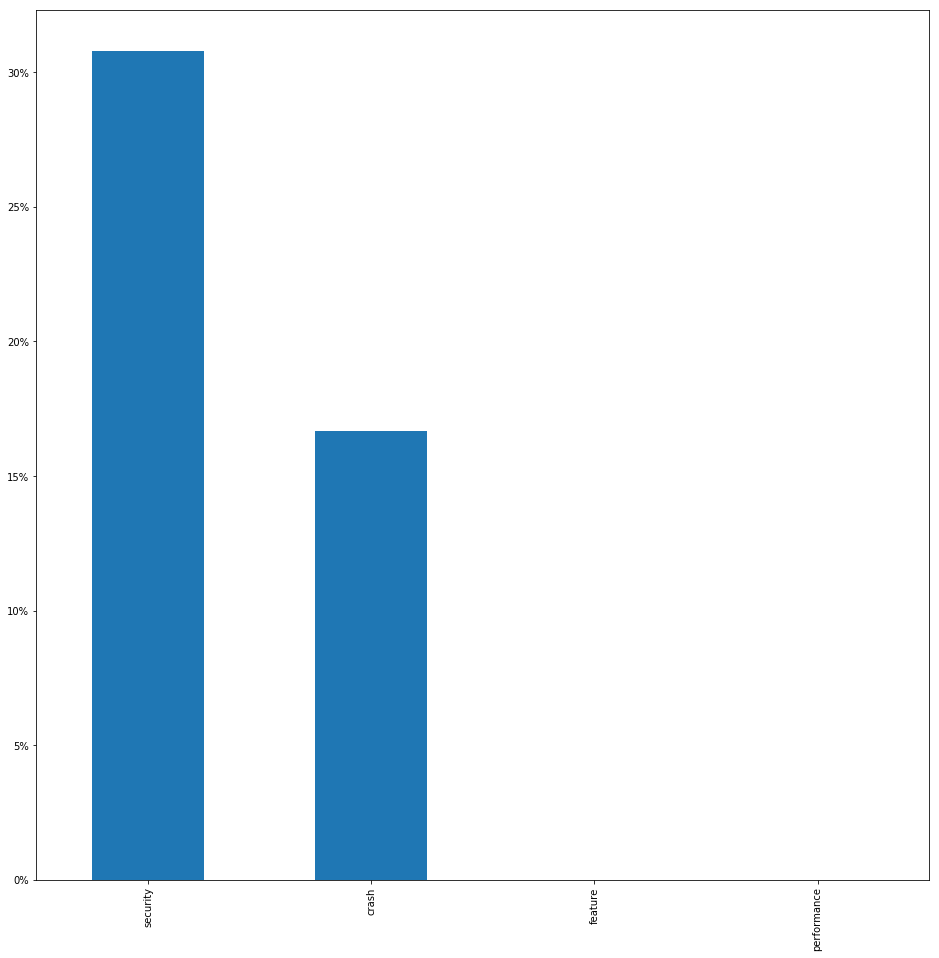

In [22]:
types = df_release.types.str.split('^').apply(pd.Series, 1).stack()
types.index = types.index.droplevel(-1)
types.name = 'Type'
types_bug_inducing = df_release[df_release['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing.index = types_bug_inducing.index.droplevel(-1)
types_bug_inducing.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = types_bug_inducing.value_counts() / types.value_counts()
res.sort_values(ascending=False).plot(kind='bar')
plt.show()

## Beta uplifts

### Bug-inducing vs non-bug-inducing uplifts per component

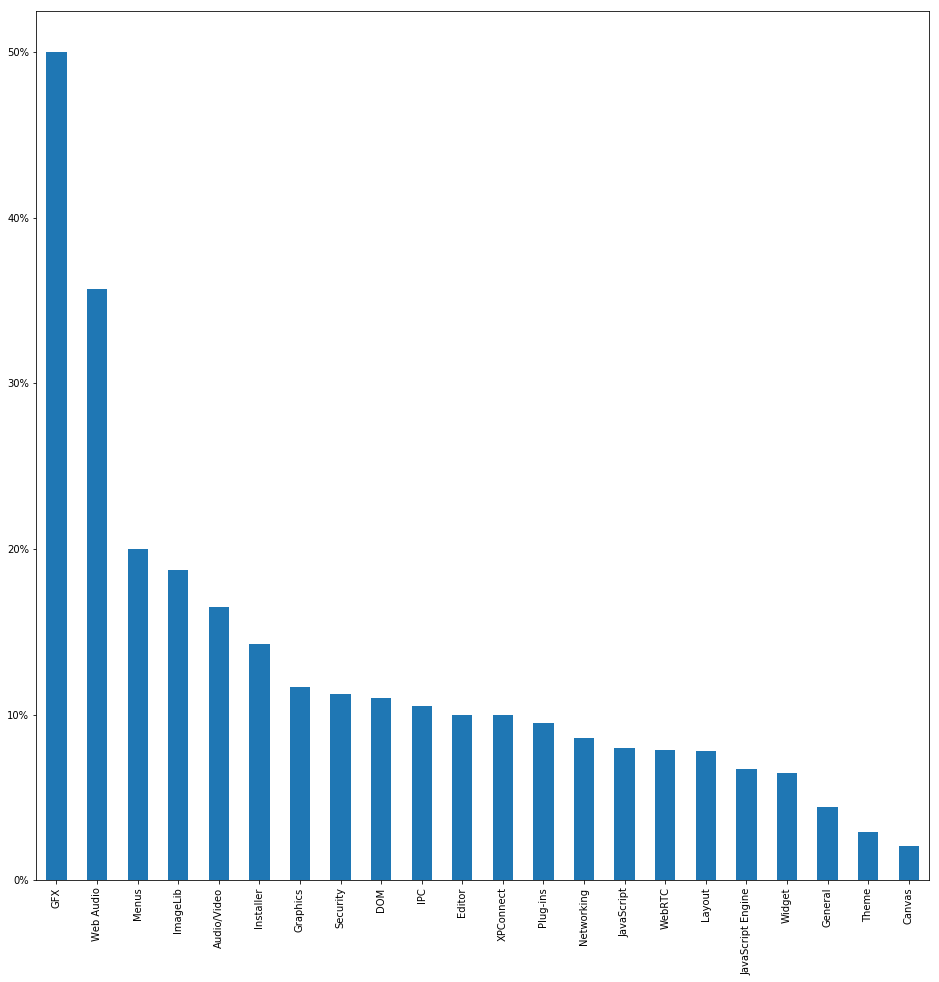

In [23]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_beta[df_beta['error_inducing'] == True].component.value_counts() / df_beta.component.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar')
plt.show()

### Bug-inducing vs non-bug-inducing uplifts per bug type

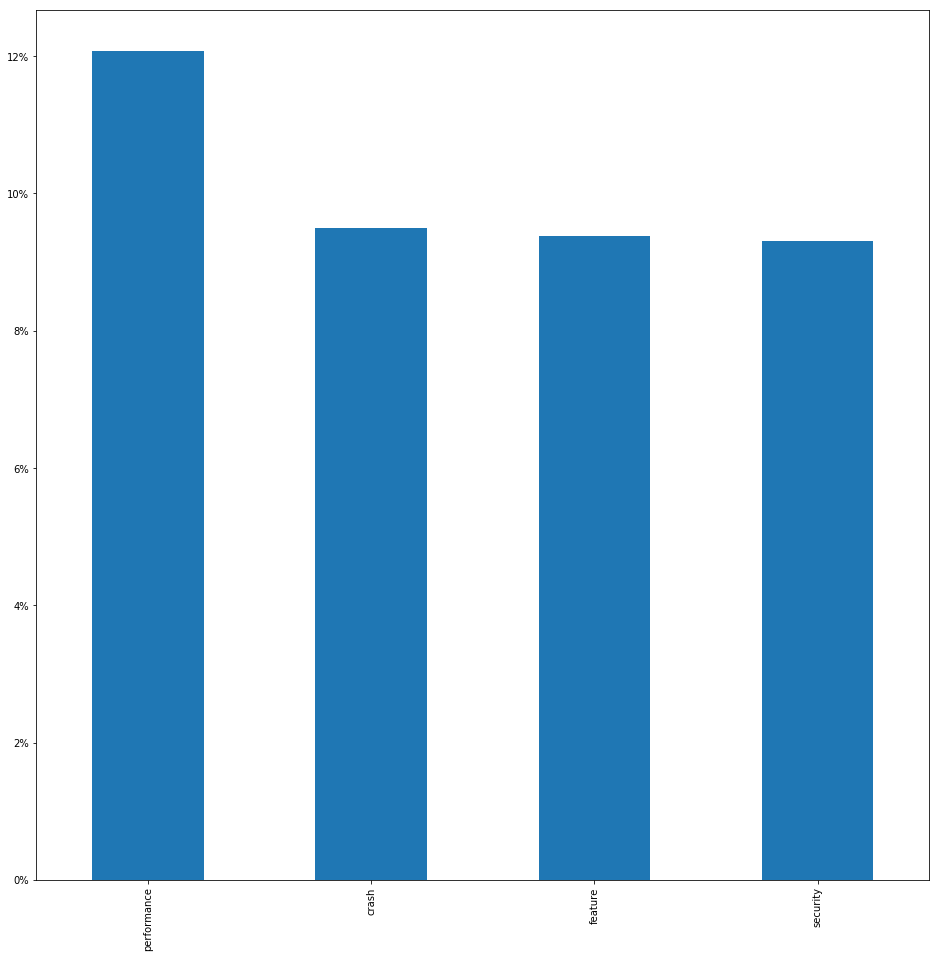

In [24]:
types = df_beta.types.str.split('^').apply(pd.Series, 1).stack()
types.index = types.index.droplevel(-1)
types.name = 'Type'
types_bug_inducing = df_beta[df_beta['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing.index = types_bug_inducing.index.droplevel(-1)
types_bug_inducing.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = types_bug_inducing.value_counts() / types.value_counts()
res.sort_values(ascending=False).plot(kind='bar')
plt.show()

## Aurora uplifts

### Bug-inducing vs non-bug-inducing uplifts per component

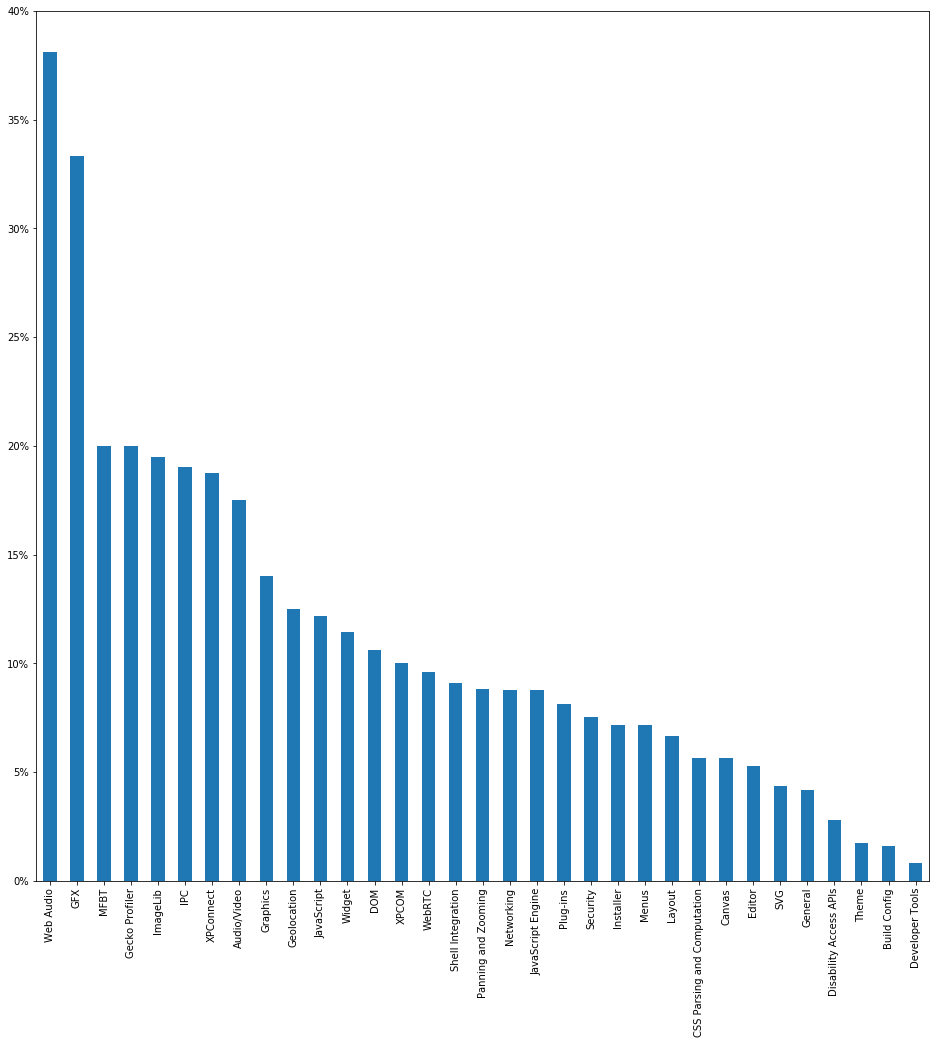

In [25]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_aurora[df_aurora['error_inducing'] == True].component.value_counts() / df_aurora.component.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar')
plt.show()

### Bug-inducing vs non-bug-inducing uplifts per bug type

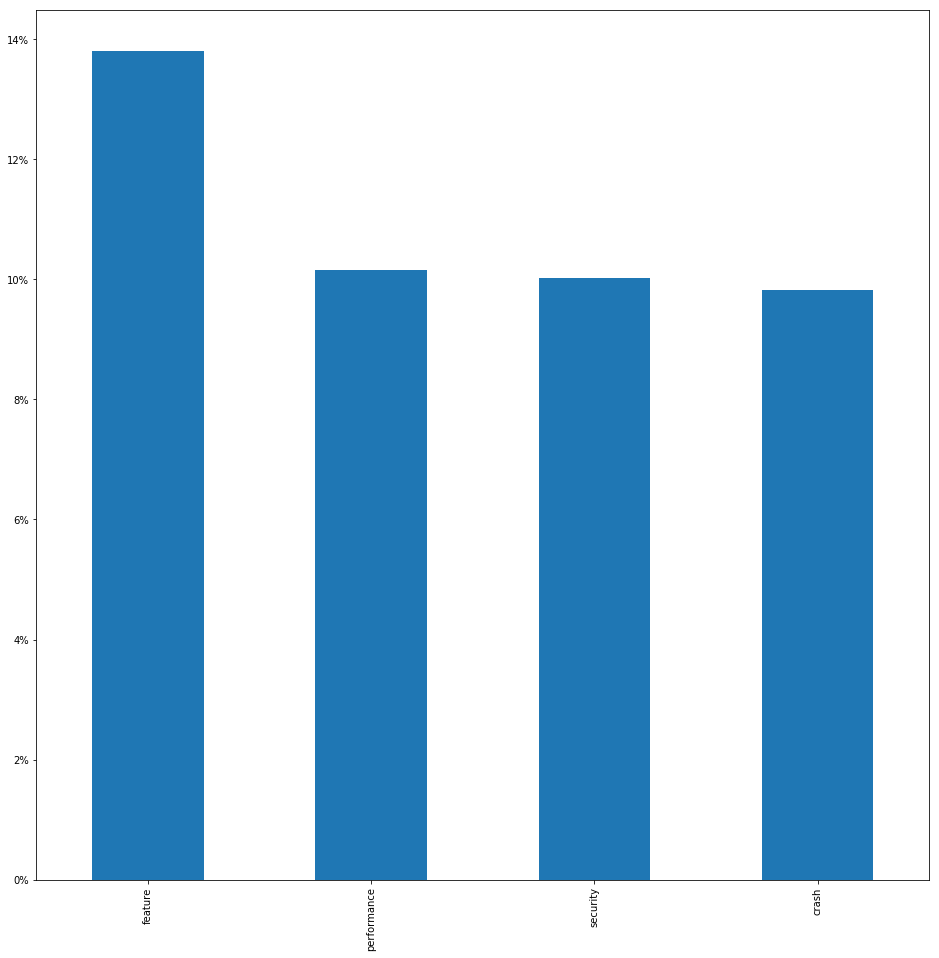

In [26]:
types = df_aurora.types.str.split('^').apply(pd.Series, 1).stack()
types.index = types.index.droplevel(-1)
types.name = 'Type'
types_bug_inducing = df_aurora[df_aurora['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing.index = types_bug_inducing.index.droplevel(-1)
types_bug_inducing.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = types_bug_inducing.value_counts() / types.value_counts()
res.sort_values(ascending=False).plot(kind='bar')
plt.show()